# Step #1 Loading the Data

In [115]:
# Work in progress!
# A tutorial for this file will soon be available at www.relataly.com
# Tested with Python 3.8.8, Matplotlib 3.5, Scikit-learn 0.24.1, Seaborn 0.11.1, numpy 1.19.5

from cryptocmd import CmcScraper
import pandas as pd 
import matplotlib.pyplot as plt 
import matplotlib.colors as col 
import matplotlib.cm as cm 
import numpy as np 
from math import log, exp 
from datetime import date, timedelta, datetime
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
import matplotlib.dates as mdates
import matplotlib.cbook as cbook
import plotly.graph_objects as go
sns.set_style('white', {'axes.spines.right': False, 'axes.spines.top': False})
from datetime import datetime
from scipy.stats import norm

coinlist = ['BTC', 'ETH', 'XRP', 'ADA']
for coinname in coinlist:

    # initialise scraper without time interval
    scraper = CmcScraper(coinname)

    # get raw data as list of list
    headers, data = scraper.get_data()

    # get data in a json format
    json_data = scraper.get_data("json")

    # export the data as csv file, you can also pass optional `name` parameter
    scraper.export("csv", name=f'{coinname}_all_time')

    # Pandas dataFrame for the same data
    df_temp = scraper.get_dataframe()
    df = pd.DataFrame()
    for colname in ['Open', 'Close', 'High', 'Low']:
        df[coinname + '_' + colname] = df_temp[colname]
        
    df[coinname + '_Avg'] = (df_temp['Close'] + df_temp['Open']) / 2
    df.index = df_temp['Date']
    
    if coinname == 'BTC':
        df_crypto = df.copy() 
    else:    
        df_crypto = pd.merge(
            left=df_crypto,
            right=df,
            how="left",
            left_index=True, right_index=True)     

df_crypto

,BTC_Open,BTC_Close,BTC_High,BTC_Low,BTC_Avg,ETH_Open,ETH_Close,ETH_High,ETH_Low,ETH_Avg,XRP_Open,XRP_Close,XRP_High,XRP_Low,XRP_Avg,ADA_Open,ADA_Close,ADA_High,ADA_Low,ADA_Avg
Date,,,,,,,,,,,,,,,,,,,,
2022-09-27,19221.840713,19110.546551,20338.455461,18915.668722,19166.193632,1335.337030,1330.127702,1396.891513,1308.991494,1332.732366,0.467764,0.448776,0.485228,0.440310,0.458270,0.446819,0.441890,0.462494,0.438172,0.444355
2022-09-26,18803.900633,19222.672184,19274.873498,18721.285851,19013.286409,1294.386154,1335.320244,1335.526410,1282.049358,1314.853199,0.492681,0.467678,0.499861,0.459837,0.480180,0.446299,0.446757,0.450270,0.438234,0.446528
2022-09-25,18936.311515,18802.097976,19134.733194,18696.468304,18869.204745,1317.938520,1294.216774,1333.371380,1275.627710,1306.077647,0.488732,0.492627,0.518314,0.478734,0.490680,0.451599,0.446188,0.461773,0.440216,0.448893
2022-09-24,19296.990704,18937.011176,19310.197608,18861.973999,19117.000940,1328.244673,1317.993238,1346.255290,1312.640291,1323.118955,0.507200,0.488716,0.515015,0.474019,0.497958,0.461830,0.451600,0.467096,0.451294,0.456715
2022-09-23,19412.399925,19297.637840,19464.672348,18617.553010,19355.018883,1327.481170,1328.259555,1353.288324,1270.198314,1327.870362,0.485137,0.507171,0.552283,0.458918,0.496154,0.458951,0.461821,0.479108,0.448352,0.460386
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013-05-02,116.379997,105.209999,125.599998,92.281898,110.794998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-05-01,139.000000,116.989998,139.889999,107.720001,127.994999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-04-30,144.000000,139.000000,146.929993,134.050003,141.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Step #2 Plotting Moving Averages

In [38]:
# Questions
# Where is the price compared to the moving 100-day moving average?

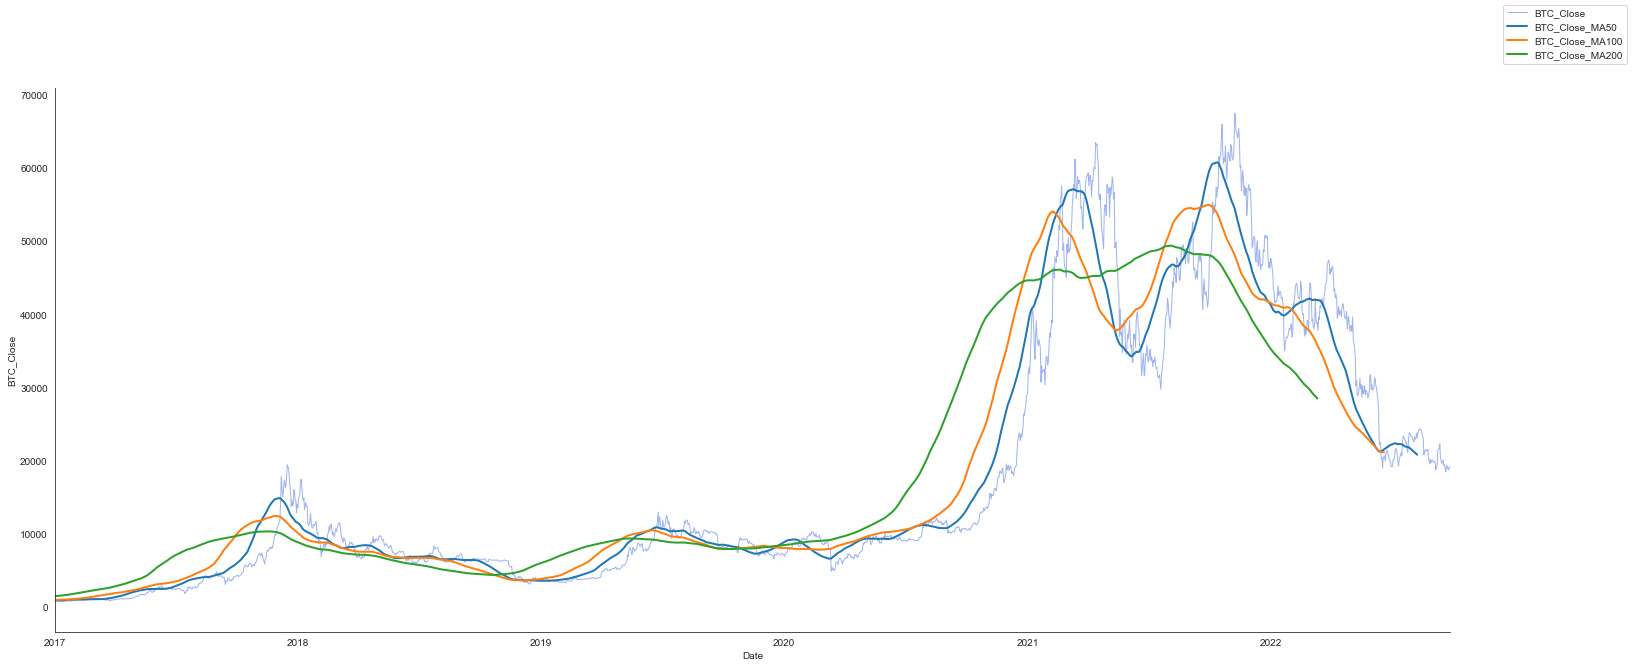

In [37]:
# select  coins for which you want to make the lineplots

coin_name = 'BTC' +'_Close'
ma_list = [50, 100, 200] # moving average rolling window lengthes

# make a copy of the initial dataset
df_ma = df_crypto[[coin_name]].copy()
df_ma

# lineplot
def make_lineplot(coin_name, ma_list):
    fig = plt.subplots(figsize=(25, 10))
    ax = sns.lineplot(data=df_ma[coin_name], linewidth = 1, color='royalblue', dashes=True, alpha=0.5)
    for i in ma_list:
        ma_col_name = coin_name + '_MA' + str(i)
        df_ma[ma_col_name] = df_ma[coin_name].rolling(window=i).mean()
        sns.lineplot(data=df_ma[ma_col_name], linewidth = 2, dashes=None, alpha=1, ax=ax)
        
    # add legend
    ax.figure.legend(df_ma)
        
    # limit the timeframe
    plt.xlim(datetime.fromisoformat('2017-01-01'), df_ma.index.max()) 
    plt.show()

# make the plot
make_lineplot(coin_name, ma_list)

# Step #3 Plotting Logarithmic Linecharts

In [ ]:
# Questions:
# How did ETH perform against BTC?

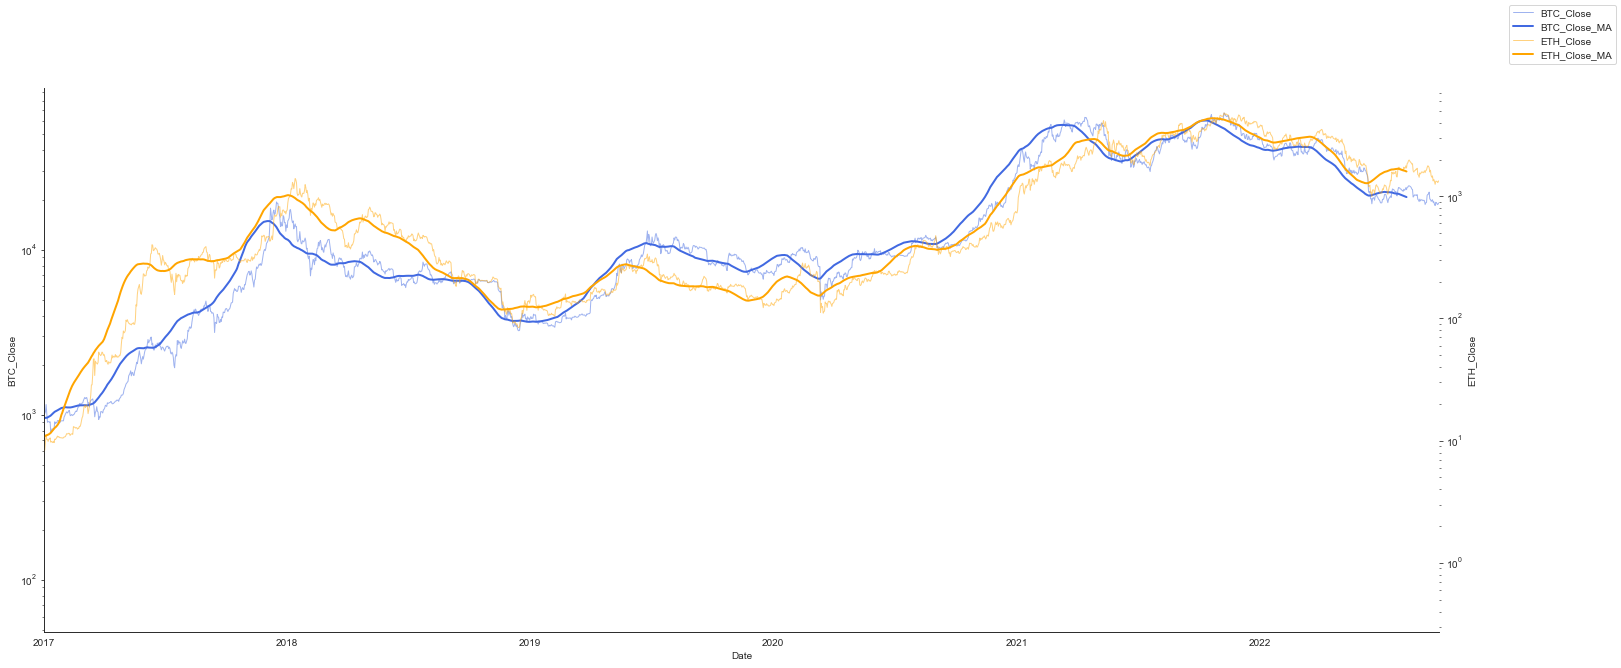

In [55]:
# select  coins for which you want to make the lineplots
variable_list = ['BTC_Close', 'ETH_Close']

# prepare the data for the lineplot
# lineplot
def make_lineplot(variable_list, window):
    # make a copy of the initial dataset
    df_log = df_crypto[variable_list].copy()
    
    fig = plt.subplots(figsize=(25, 10))
    # calculate the rolling window
    for variable_name in variable_list:
        df_log[variable_name + '_MA'] = df_crypto[variable_name].rolling(window=window).mean()
    
    ax = sns.lineplot(data=df_log[variable_list[0]], linewidth = 1, color='royalblue', dashes=True, alpha=0.5)
    ax = sns.lineplot(data=df_log[variable_list[0] + '_MA'], linewidth = 2, color='royalblue', dashes=None, alpha=1)
    plt.yscale('log')

    ax2 = plt.twinx()
    sns.lineplot(data=df_log[variable_list[1]], linewidth = 1, color='orange',ax=ax2, alpha=0.5)
    sns.lineplot(data=df_log[variable_list[1] + '_MA'], linewidth = 2, color='orange', ax=ax2, alpha=1)
    ax2.figure.legend(df_log[[variable_list[0], variable_list[0] + '_MA', variable_list[1], variable_list[1] + '_MA']])
    plt.xlim(datetime.fromisoformat('2017-01-01'), df_log.index.max())
    plt.yscale('log')
    plt.show()

make_lineplot(variable_list, 50)

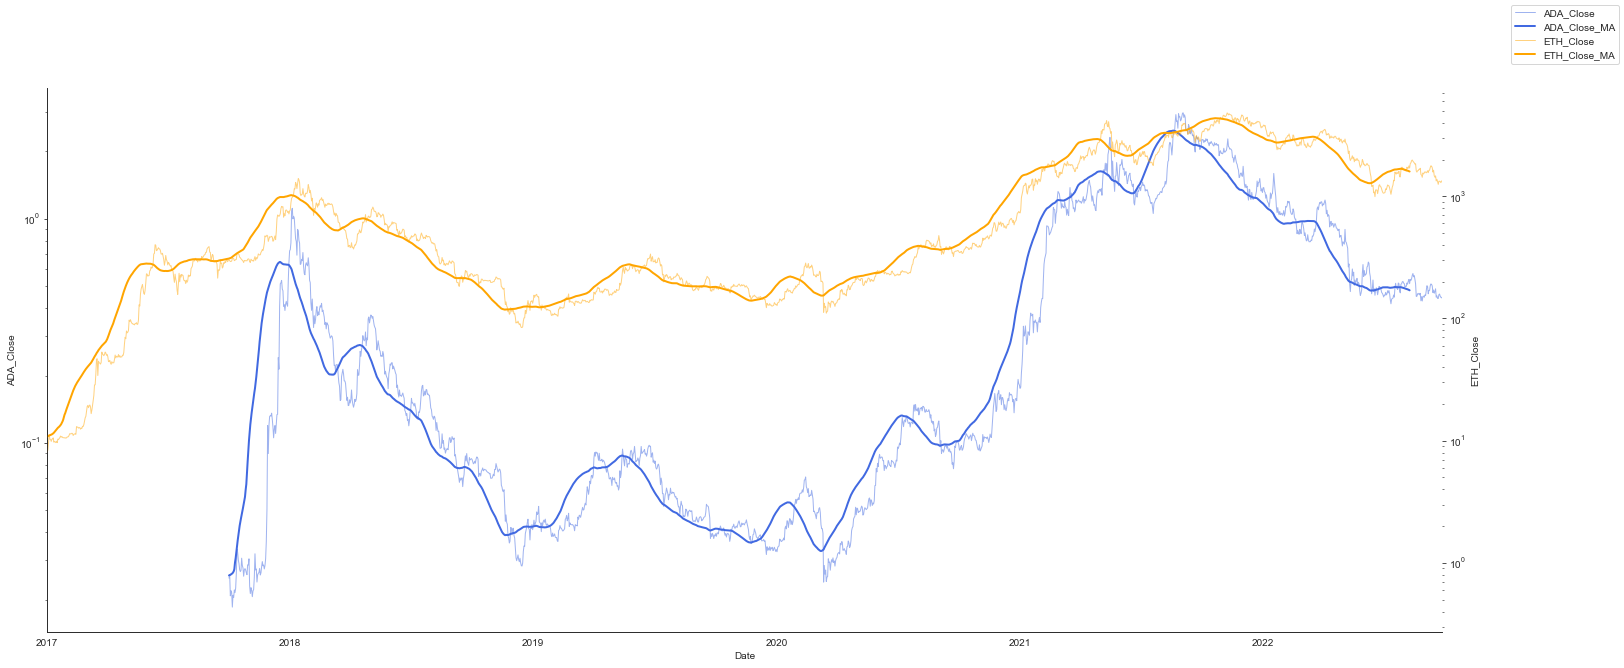

In [56]:
variable_list = ['ADA_Close', 'ETH_Close']
make_lineplot(variable_list, 50)

# Step #4 Bitcoin and Ethereum ROI by Month

In [ ]:
# Questions
# Which is the best month to buy Bitcoin or Ethereum?

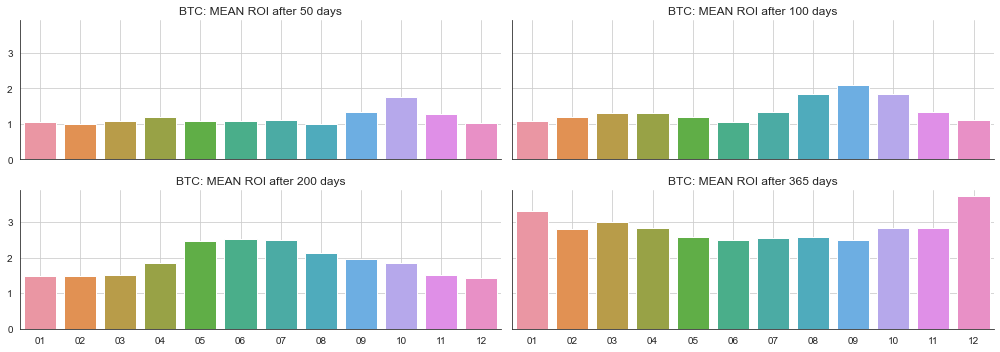

In [8]:
df = df_crypto.copy()

d = pd.to_datetime(df.index)
df['Day'] = d.strftime("%d") 
df['Weekday'] = d.strftime("%A") 
df['Month'] = d.strftime("%m") 
df['Year'] = d.strftime("%Y") 
df

def roi(df, coinname, t_list, temp):
    ncols = 2; nrows = 2
    fig, axs = plt.subplots(ncols,nrows,figsize=(14,5), sharey=True, sharex=True)
    df_group = pd.DataFrame()
    for i in range(0, len(t_list)):
        t = t_list[i]
        df_group['p'] = df.shift(t)[f'{coinname}_Avg'] / df[f'{coinname}_Avg']
        df_group[temp] = df[temp]
        roi_monthly = df_group['p'].groupby(df_group[temp]).mean()
        ax = plt.subplot(nrows, ncols, i + 1)
        sns.barplot(y=roi_monthly, x=roi_monthly.index, ax=ax)
        ax.set_title(f'{coinname}: MEAN ROI after {t} days')
        plt.grid()
        ax.set(xlabel=None)
        ax.set(ylabel=None)
    plt.tight_layout()


coinname= 'BTC'
t_list = [50, 100, 200, 365]
temp = 'Month'
roi(df, coinname, t_list, temp)

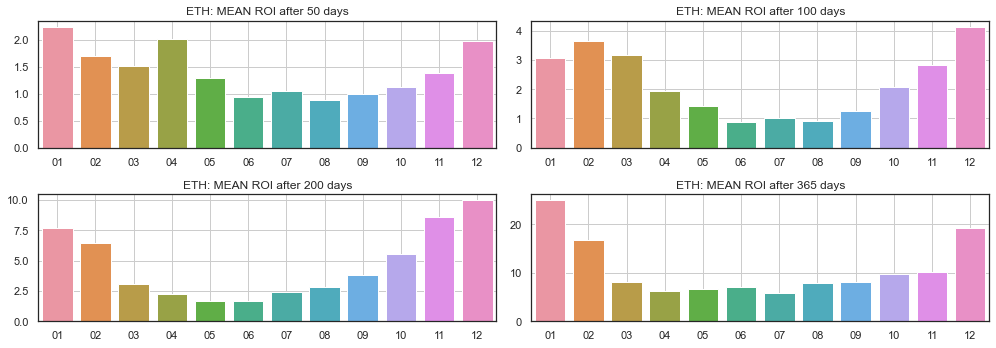

In [6]:
# monthly differences for ETH
coinname= 'ETH'
t_list = [50, 100, 200, 365]
temp = 'Month'
roi(df, coinname, t_list, temp)

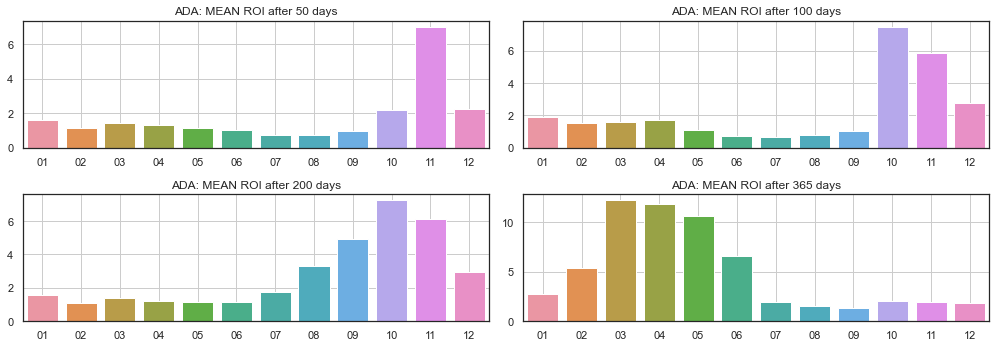

In [7]:
# monthly differences for ADA
coinname= 'ADA'
t_list = [50, 100, 200, 365]
temp = 'Month'
roi(df, coinname, t_list, temp)

# Step #5 ROI

In [11]:
# Questions
# What is the best weekday to buy Bitcoin or Ethereum?

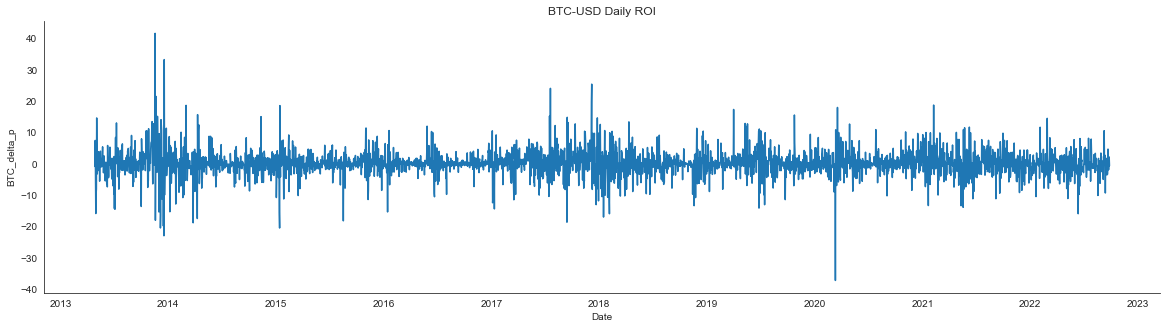

In [70]:
coinname = 'BTC'

# Plot histograms
fig, axs = plt.subplots(figsize=(20,5))
c_close = f'{coinname}_Close'
c_open = f'{coinname}_Open'
df_roi = df[[c_close, c_open]].copy()
df_roi[f'{coinname}_delta_p'] = (df_roi[c_close] - df_roi[c_open]) / df_roi[c_open] * 100

d = pd.to_datetime(df.index)
df_roi['Day'] = d.strftime("%d") 
df_roi['Weekday'] = d.strftime("%A") 
df_roi['Month'] = d.strftime("%m") 
df_roi['Year'] = d.strftime("%Y") 

#palette = sns.color_palette("mako_r", df_delta_p.shape[1])
ax = sns.lineplot(data=df_roi[f'{coinname}_delta_p'] , linewidth = 1.5)
plt.title('BTC-USD Daily ROI')
plt.show()

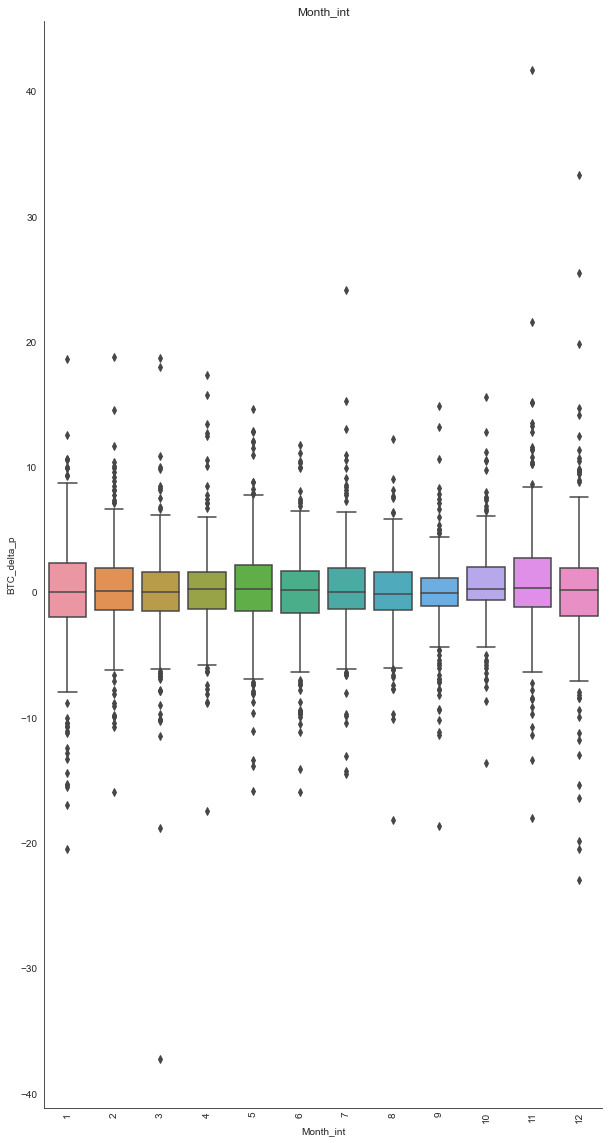

In [96]:
df_roi.head()
df_roi['Month_int'] = pd.to_numeric(df_roi['Month'])

# Kde Plots
def make_kdeplot(column_name):
    fig, ax = plt.subplots(figsize=(10,20))
    sns.boxplot(data=df_roi, y='BTC_delta_p', x=column_name)
    ax.tick_params(axis="x", rotation=90, labelsize=10, length=0)
    ax.set_title(column_name)
    #ax.set_xlim(0, df[target_name].quantile(0.99))
    plt.show()

# make kde plot
make_kdeplot('Month_int')

# Step #6 Daily Gains and Losses

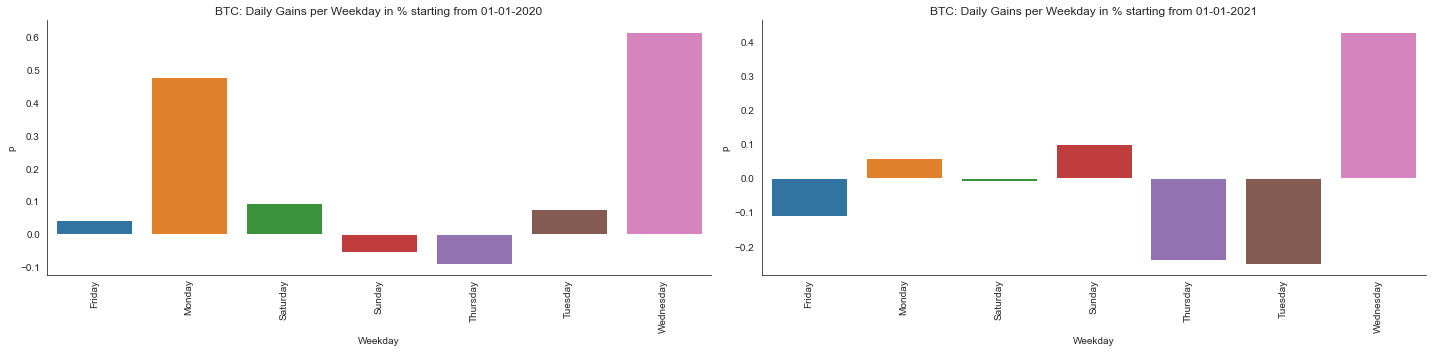

In [107]:
df = df_crypto.copy()

d = pd.to_datetime(df.index)
df['Day'] = d.strftime("%d") 
df['Weekday'] = d.strftime("%A") 
df['Month'] = d.strftime("%m") 
df['Year'] = d.strftime("%Y") 

def daily_gains(df, df_filter, coinname, temp):

    fig, axs = plt.subplots(1, len(datefilter), figsize=(20,5))
    for i in range(0, len(datefilter)):
        df_filter = df[df.index > datetime.strptime(datefilter[i], '%d-%m-%Y')]
        
        df_group = pd.DataFrame()
        df_group['p'] = (df_filter[f'{coinname}_Close'] - df_filter[f'{coinname}_Open']) / df_filter[f'{coinname}_Open'] * 100
        df_group[temp] = df_filter[temp]

        daily_gain = df_group['p'].groupby(df_group[temp]).mean()
        sns.barplot(y=daily_gain, x=daily_gain.index, ax=axs[i])
        axs[i].set_title(f'{coinname}: Daily Gains per {temp} in % starting from {datefilter[i]}')
        axs[i].tick_params(axis="x", rotation=90, labelsize=10, length=0)
        plt.tight_layout()
    
coinname= 'BTC'
temp = 'Weekday'
datefilter = ['01-01-2020', '01-01-2021']
daily_gains(df, datefilter, coinname, temp)

# Step #7 Risk of a 10% Drop

In [125]:
# # Questions
# # What is the probability of a 10% drop in price?

# coinname = 'BTC'

# # Plot histograms
# c_close = f'{coinname}_Close'
# c_open = f'{coinname}_Open'
# df_roi = df[[c_close, c_open]].copy()
# df_roi[f'{coinname}_delta_p'] = (df_roi[c_close] - df_roi[c_open]) / df_roi[c_open] * 100

# df_roi['LogReturn'] = np.log(df_roi[c_close]).shift(-1) - np.log(df_roi[c_open])
# mu = df_roi['LogReturn'].mean()
# sigma = df_roi['LogReturn'].std(ddof=1)

# density = pd.DataFrame()
# density['x'] = np.arange(df_roi['LogReturn'].min()-0.01, df_roi['LogReturn'].max()+0.01, 0.001)
# density['pdf'] = norm.pdf(density['x'], mu, sigma)

# df_roi['LogReturn'].hist(bins=100, figsize=(15, 8))
# plt.plot(density['x'], density['pdf'], color='red')

# Step #8 Correlation

In [ ]:
# Questions
# How correlated is the price of assets a and b?

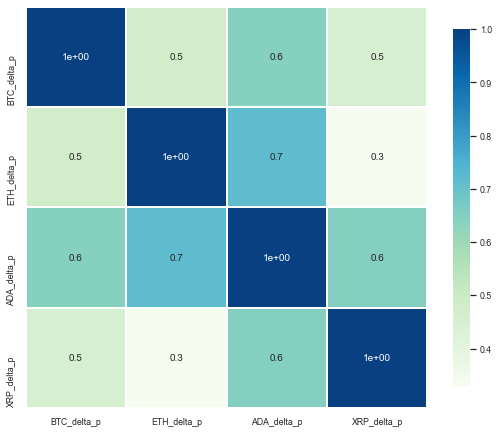

In [124]:
# make a copy of the original dataframe
df_cor = df_crypto.copy()

# generate the correlation values
variable_list = ['BTC', 'ETH', 'ADA', 'XRP']

for coinname in variable_list:
    c_close = coinname + '_Close'
    c_open = coinname + '_Open'
    df_cor[coinname + '_delta'] = df_cor[c_close] - df_cor[c_open]
    df_cor[coinname + '_delta_p'] = 100 * (df_cor[coinname + '_delta']) / df_cor[c_close]
    df_cor[coinname + '_delta_p']

s = [x+'_delta_p' for x in variable_list]

# correlation heatmap
plt.figure(figsize = (9,8))
plt.yticks(rotation=0)
ax =  sns.heatmap(df_cor[s].corr(), cmap='GnBu',square=True, linewidths=.1, cbar_kws={"shrink": .82},annot=True, fmt='.1',annot_kws={"size":10})
sns.set(font_scale=0.8)
for f in ax.texts:
        f.set_text(f.get_text())  